In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, BatchNormalization, Dropout, Flatten, GlobalMaxPooling1D, GRU, Attention, GlobalAveragePooling1D
from tensorflow.compat.v1.keras import backend as K
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [5]:
# Load your CSV data
data = pd.read_csv('/content/gdrive/MyDrive/Capstone/dataset - Kualifikasi.csv')

In [6]:
data.describe()

,Job Position,Office,City,Country,Salary,Work Time,Job Level,Job Level Specific,Job_Category,Industry,Qualification 1,Qualification 2,Qualification 3,Qualification 4,Qualification 5,Unnamed: 15
count,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1123,1107,1078,992,3
unique,1039,242,64,6,214,7,7,5,23,117,882,928,916,884,818,3
top,Account Executive,Aces Call Center Jobs Inc.,Singapore,Indonesia,Salary Undisclosed,Full Time,Entry Level,"Junior, Apprentice",Sales and Marketing,Financial Services,Filipino,"Minimum D3/S1 in all majors, preferably Econom...",Minimum 1-3 years experience as marketing offi...,Have experience as a leader/supervisor min. 2 ...,Have a private vehicle and an active SIM C,Attractive
freq,8,101,172,686,759,1028,630,630,308,166,33,13,13,13,14,1


In [7]:
data.head()

,Job Position,Office,City,Country,Salary,Work Time,Job Level,Job Level Specific,Job_Category,Industry,Qualification 1,Qualification 2,Qualification 3,Qualification 4,Qualification 5,Unnamed: 15
0,.NET Developer,NTT INDONESIA TECHNOLOGY,Jakarta Pusat,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,IT and Software,Information Technology / IT,Bachelor degree majoring in computer science /...,Candidate should have minimum 3 years experien...,Strong hands on experience in Microsoft .NET p...,Experience in ASP.NET component KendoUI/Devexp...,Experience in database scripting SQL Server / ...,NaN
1,.Net Senior API developer,Gluon Consulting Pte. Ltd.,Jakarta Pusat,Indonesia,"IDR 23,158,053.49 - IDR 38,596,755.82",Full Time (Remote),Mid-Senior Level,Manager,IT and Software,IT and Software,At least 5 years of software development exper...,Knowledge of the ASP.NET Core API development ...,Proven experience building REST API using esta...,Experience with at least two of: relational da...,"Experience with unit testing, containerization...",NaN
2,[BANDAR JAYA] Microfinancing Sales Section Head,FIFGROUP,Bandar Lampung,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,Sales and Marketing,Financial Services,Max age. 32 years,"Minimum D3/S1 in all majors, preferably Econom...",Minimum 1-3 years experience as marketing offi...,Have experience as a leader/supervisor min. 2 ...,Having experience in the field of micro financ...,NaN
3,[CAKUNG] Microfinancing Sales Section Head,FIFGROUP,Jakarta Timur,Indonesia,Salary Undisclosed,Full Time,Associate,Supervisor,Sales and Marketing,Financial Services,Max age. 32 years,"Minimum D3/S1 in all majors, preferably Econom...",Minimum 1-3 years experience as marketing offi...,Have experience as a leader/supervisor min. 2 ...,Having experience in the field of micro financ...,NaN
4,[HCM] Growth Marketing Manager,Timo Digital Bank,"Thành phố Hồ Chí Minh,",Vietnam,Salary Undisclosed,Full Time,Mid-Senior Level,Manager,Sales and Marketing,Banking,High logical thinking: seeing the nature of a ...,Deep understanding of human psychology and an ...,Creative and pragmatic at the same time: how t...,You will work in a healthy working environment...,You will also have extremely smart and interes...,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Position        1124 non-null   object
 1   Office              1124 non-null   object
 2   City                1124 non-null   object
 3   Country             1124 non-null   object
 4   Salary              1124 non-null   object
 5   Work Time           1124 non-null   object
 6   Job Level           1124 non-null   object
 7   Job Level Specific  1124 non-null   object
 8   Job_Category        1124 non-null   object
 9   Industry            1124 non-null   object
 10  Qualification 1     1124 non-null   object
 11  Qualification 2     1123 non-null   object
 12  Qualification 3     1107 non-null   object
 13  Qualification 4     1078 non-null   object
 14  Qualification 5     992 non-null    object
 15  Unnamed: 15         3 non-null      object
dtypes: object(16)
memory usa

In [9]:
missing_data = data.isnull()
total_missing = missing_data.sum()
print(total_missing)

Job Position             0
Office                   0
City                     0
Country                  0
Salary                   0
Work Time                0
Job Level                0
Job Level Specific       0
Job_Category             0
Industry                 0
Qualification 1          0
Qualification 2          1
Qualification 3         17
Qualification 4         46
Qualification 5        132
Unnamed: 15           1121
dtype: int64


In [47]:
# Assuming 'Job Position' is the column you are interested in
labels = data['Job Position']

# Tokenize and pad sequences
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(labels)

x_seq = tokenizer.texts_to_sequences(labels)
x_pad = pad_sequences(x_seq, maxlen=max_len)

# Convert labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoding
one_hot_labels = to_categorical(encoded_labels)

# Build the NLP model for classification
num_classes = len(label_encoder.classes_)
model_classification = Sequential()
model_classification.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model_classification.add(Dense(512, activation='relu'))
model_classification.add(GlobalMaxPooling1D())
model_classification.add(Dropout(0.2))
model_classification.add(Dense(256, activation='relu'))
model_classification.add(Dropout(0.2))
model_classification.add(Dense(num_classes, activation='softmax'))  # Output layer for classification task

# Compile the model for classification
model_classification.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Use one-hot encoded labels as target
dummy_target_classification = np.zeros((len(x_pad), num_classes))
dummy_target_classification[:len(x_pad)] = one_hot_labels

# Train the classification model
history_classification = model_classification.fit(x_pad, dummy_target_classification, epochs=100, batch_size=384)


Epoch 1/100
3/3 [==============================] - 6s 1s/step - loss: 6.9704 - accuracy: 0.0027
Epoch 2/100
3/3 [==============================] - 2s 508ms/step - loss: 6.9420 - accuracy: 0.0080
Epoch 3/100
3/3 [==============================] - 1s 468ms/step - loss: 6.9168 - accuracy: 0.0142
Epoch 4/100
3/3 [==============================] - 1s 314ms/step - loss: 6.8277 - accuracy: 0.0133
Epoch 5/100
3/3 [==============================] - 1s 312ms/step - loss: 6.6186 - accuracy: 0.0169
Epoch 6/100
3/3 [==============================] - 1s 315ms/step - loss: 6.3312 - accuracy: 0.0391
Epoch 7/100
3/3 [==============================] - 1s 320ms/step - loss: 5.8416 - accuracy: 0.0552
Epoch 8/100
3/3 [==============================] - 1s 317ms/step - loss: 5.1867 - accuracy: 0.0890
Epoch 9/100
3/3 [==============================] - 1s 314ms/step - loss: 4.3459 - accuracy: 0.1441
Epoch 10/100
3/3 [==============================] - 1s 305ms/step - loss: 3.4029 - accuracy: 0.2678
Epoch 11/100

In [35]:
model_classification.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           640000    
                                                                 
 dense_12 (Dense)            (None, 100, 512)          33280     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 512)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                      

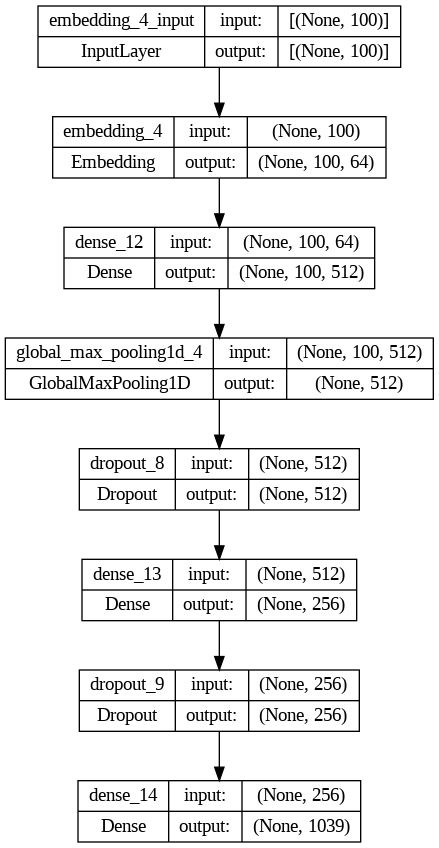

In [36]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture and show shapes
plot_model(model_classification, show_shapes=True)


In [38]:
def get_model_prediction(input_text, top_k=30, threshold=0.003):
    # Tokenization and text padding
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict categories
    prediction = model_classification.predict(input_pad)[0]

    # Gets the index of the top k predicted labels
    top_k_indices = prediction.argsort()[-top_k:][::-1]

    # Get top k predicted labels and their probabilities
    top_k_labels = [label_encoder.classes_[i] for i in top_k_indices]
    top_k_probabilities = prediction[top_k_indices]

    # Check if the top predicted probability is below the threshold
    if top_k_probabilities[0] < threshold:
        top_k_labels = ["Not Found"]
        top_k_probabilities = [1.0]  # Assign a probability of 1.0 for "Not Found"

    return top_k_labels, top_k_probabilities

# Example of use for testing models
input_text_to_test = "aopwdkawkdopdaodwkdospdl[pawldldppalp"
top_k_labels, top_k_probabilities = get_model_prediction(input_text_to_test, top_k=30)

# Add error handling for "Not Found"
if top_k_labels[0] == "Not Found":
    print("Data not found.")
else:
    print(f"Input Text: {input_text_to_test}")
    print("Top Predicted Labels:")
    for label, prob in zip(top_k_labels, top_k_probabilities):
        print(f"{label}: {prob:.4f}")


1/1 [==============================] - 0s 40ms/step
Data not found.


In [68]:
def get_model_prediction(input_text, top_k=3, threshold=0.03):
    # Tokenization and text padding
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict categories
    prediction = model_classification.predict(input_pad)[0]

    # Gets the index of the top k predicted labels
    top_k_indices = prediction.argsort()[-top_k:][::-1]

    # Get top k predicted labels and their probabilities
    top_k_labels = [label_encoder.classes_[i] for i in top_k_indices]
    top_k_probabilities = prediction[top_k_indices]

    # Check if the top predicted probability is below the threshold
    if top_k_probabilities[0] < threshold:
        top_k_labels = []  # Empty array if "Not Found"
    else:
        # After ensuring the results are valid, filter those that have a probability below the threshold
        top_k_labels = [label for label, prob in zip(top_k_labels, top_k_probabilities) if prob >= threshold]

    return top_k_labels

# Set a threshold value
threshold = 0.03

# Example of use for testing models (Fixing Typo)
input_text_to_test = "Microfinancing"
top_k_labels = get_model_prediction(input_text_to_test, top_k=3, threshold=threshold)

# Add error handling to not print if no labels are found
if not top_k_labels:
    print("Data not found.")
else:
    print(f"Input Text: {input_text_to_test}")
    print("Top Predicted Labels:")

    # Displays job positions along with their array
    print("Job Positions Array:", top_k_labels)


1/1 [==============================] - 0s 98ms/step
Input Text: Microfinancing
Top Predicted Labels:
Job Positions Array: ['Microfinancing Sales']


In [59]:
def get_model_predictions(input_text, threshold=0.03):
    # Tokenization and text padding
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_len)

    # Predict categories
    prediction = model_classification.predict(input_pad)[0]

    # Get labels and their probabilities that pass the threshold
    labels_and_probabilities = [(label_encoder.classes_[i], prob) for i, prob in enumerate(prediction) if prob >= threshold]

    # Sort labels based on probabilities in descending order
    sorted_labels_and_probabilities = sorted(labels_and_probabilities, key=lambda x: x[1], reverse=True)

    # Extract labels and probabilities
    labels = [label for label, prob in sorted_labels_and_probabilities]
    probabilities = [prob for label, prob in sorted_labels_and_probabilities]

    return labels, probabilities

# Set a threshold value
threshold = 0.03

# Example of use for testing models
input_text_to_test = "Intern Business Consulting (Sustainability Reporting)"
predicted_labels, predicted_probabilities = get_model_predictions(input_text_to_test, threshold=threshold)

# Add error handling to not print if no labels are found
if not predicted_labels:
    print("Data not found.")
else:
    print(f"Input Text: {input_text_to_test}")
    print("Predicted Labels:")
    for label, prob in zip(predicted_labels, predicted_probabilities):
        print(f"{label}: {prob}")


1/1 [==============================] - 0s 21ms/step
Input Text: Intern Business Consulting (Sustainability Reporting)
Predicted Labels:
Intern Business Consulting (Sustainability Reporting): 1.0


In [ ]:
from sklearn.metrics import classification_report
# Evaluate the model on the test set
test_predictions = model_classification.predict(x_pad)
test_labels_encoded = label_encoder.transform(labels)

# Convert numerical labels to their original format (not one-hot encoded)
test_labels_original = label_encoder.inverse_transform(test_labels_encoded)

# Generate class-specific metrics
class_report = classification_report(test_labels_encoded, test_predictions.argmax(axis=1), target_names=label_encoder.classes_)

print("Classification Report:")
print(class_report)

36/36 [==============================] - 1s 21ms/step
Classification Report:
                                                                                                          precision    recall  f1-score   support

                                                                                          .NET Developer       1.00      1.00      1.00         1
                                                                               .Net Senior API developer       1.00      1.00      1.00         1
                                                                                        A Concept Artist       1.00      1.00      1.00         1
                                                                              ASSISTANT - PLANNING ADMIN       1.00      1.00      1.00         1
                                                                          ASSISTANT - PRODUCT MANAGEMENT       1.00      1.00      1.00         1
                                              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


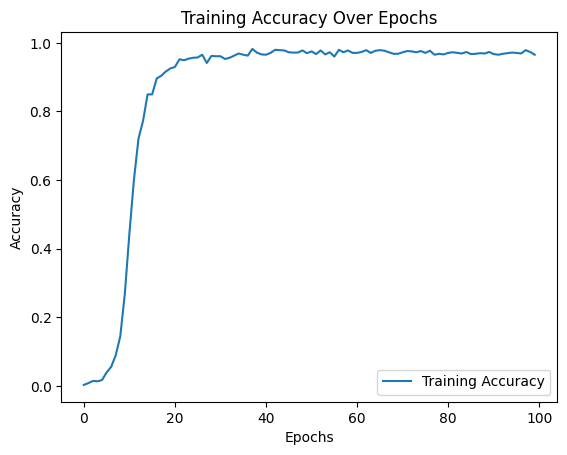

In [52]:
# Plot training accuracy
plt.plot(history_classification.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Simpan model dalam format SavedModel
saved_model_path = "/content/gdrive/MyDrive/Capstone/saved_model_new"
model_classification.save(saved_model_path)

# Konversi model SavedModel ke format tflite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Simpan model tflite ke file
tflite_model_path = "/content/gdrive/MyDrive/Capstone/model_classification_new.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)


In [ ]:
# Save the model to a file
model_classification.save('classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
